In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data Science Job Salaries.csv")

In [7]:
df.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_status,company_size_label,experience_level_label
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,No Remote Work,Large,Mid-Level
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,No Remote Work,Small,Senior-Level
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Partially Remote,Medium,Senior-Level
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,No Remote Work,Small,Mid-Level
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Partially Remote,Large,Senior-Level
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Fully Remote,Large,Entry-Level
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,Fully Remote,Small,Senior-Level
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Partially Remote,Large,Mid-Level
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,Fully Remote,Large,Mid-Level
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,Partially Remote,Small,Senior-Level


In [5]:
#Map remote_ratio and company_size to readable labels
df['remote_status'] = df['remote_ratio'].map({
    0: 'No Remote Work',
    50: 'Partially Remote',
    100: 'Fully Remote'
})

df['company_size_label'] = df['company_size'].map({
    'S': 'Small', 'M': 'Medium', 'L': 'Large'
})

df['experience_level_label'] = df['experience_level'].map({
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive-Level'
})

# Exploratory Data Analysis

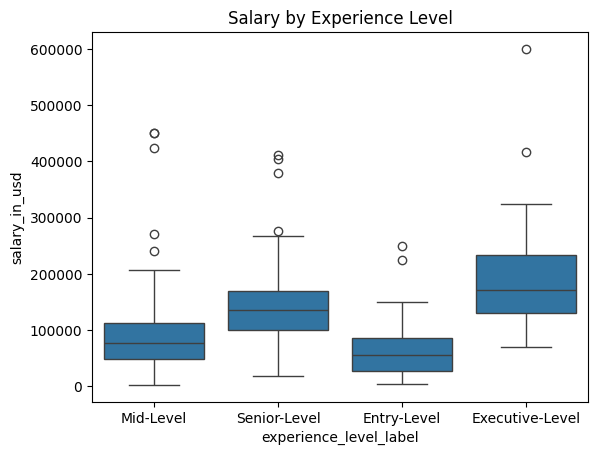

In [8]:
# Salary by experience level
sns.boxplot(x='experience_level_label', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

# Data Preparation for Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Features and target
X = df[['job_title', 'experience_level', 'employment_type', 'remote_status', 'company_location', 'company_size_label']]
y = df['salary_in_usd']

# One-hot encode categorical variables
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print("Model score on test data:", model.score(X_test, y_test))

Model score on test data: 0.45588352220951756


# Predicting Salary for New Inputs

In [11]:
sample = pd.DataFrame([{
    'job_title': 'Data Scientist',
    'experience_level': 'SE',
    'employment_type': 'FT',
    'remote_status': 'Fully Remote',
    'company_location': 'US',
    'company_size_label': 'Large'
}])

predicted_salary = model.predict(sample)
print("Predicted salary: $", round(predicted_salary[0], 2))

Predicted salary: $ 155454.09
